# Pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
root_dir = '/content/drive/MyDrive/credit-now' if os.getcwd().split('/')[-1] != 'credit-now' else './'
os.chdir(root_dir)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import credit_data

## Installation

In [ ]:
# !pip install pycaret==2.3.10

In [ ]:
# pip install jinja2==3.1.2

In [ ]:
# pip install xgboost==1.6.0

## Pycaret Classification

In [ ]:
from pycaret.classification import *

train_data, train_label =  credit_data.load_train_data(test_size=0, encoding=False)
train_data.head()

,index,age,begin_month,car,career,cluster,days_income,days_unemployed,edu_type,email,...,income_type,month_birth,month_unemployed,occyp_type,phone,reality,week_birth,week_unemployed,work_phone,credit
0,0,38,6.0,1,12,30,10.882416,9190,1,1,...,1,7.0,6.0,1,1,1,1.0,0.0,1,1.0
1,1,31,5.0,1,4,15,19.156347,9840,2,2,...,1,7.0,4.0,2,1,2,1.0,1.0,1,1.0
2,2,52,22.0,2,12,8,19.131840,14653,1,1,...,2,0.0,8.0,3,2,2,2.0,1.0,1,2.0
3,3,41,37.0,1,5,30,11.786962,12996,2,1,...,1,10.0,1.0,4,2,2,3.0,0.0,1,0.0
4,4,41,26.0,2,5,5,9.187959,12932,1,1,...,3,9.0,11.0,3,1,2,0.0,3.0,1,2.0


In [ ]:
model = setup(data = train_data, 
            target = 'credit',
            train_size = 0.7,
            session_id = 9) 

,Description,Value
0,session_id,9
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(22724, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


## Create Model

In [ ]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7021,0.7020,0.4528,0.6865,0.6417,0.2746,0.3374
1,0.6996,0.7056,0.4495,0.6731,0.6391,0.2745,0.3296
2,0.6895,0.7023,0.4228,0.6279,0.6183,0.2362,0.2971
3,0.6882,0.7002,0.4287,0.6575,0.6192,0.2328,0.2939
4,0.6952,0.7088,0.4264,0.6534,0.6217,0.2432,0.3135
5,0.6970,0.6836,0.4434,0.6716,0.6339,0.2606,0.3224
6,0.6994,0.7045,0.4507,0.6818,0.6395,0.2700,0.3278
7,0.7157,0.7040,0.4709,0.7227,0.6588,0.3085,0.3764
8,0.6950,0.7082,0.4413,0.6764,0.6302,0.2514,0.3147


In [ ]:
top_3_models = compare_models(sort='Accuracy', n_select = 3)
# Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7064,0.7427,0.5029,0.6790,0.6723,0.3415,0.3654,2.184
xgboost,Extreme Gradient Boosting,0.6972,0.7015,0.4420,0.6716,0.6326,0.2592,0.3211,8.487
lightgbm,Light Gradient Boosting Machine,0.6951,0.6917,0.4219,0.6754,0.6170,0.2317,0.3141,0.529
ada,Ada Boost Classifier,0.6910,0.6306,0.4066,0.6333,0.6026,0.2045,0.3040,0.692
gbc,Gradient Boosting Classifier,0.6907,0.6548,0.4101,0.6607,0.6056,0.2099,0.3004,7.240
et,Extra Trees Classifier,0.6809,0.7174,0.5086,0.6548,0.6580,0.3143,0.3248,1.977
lda,Linear Discriminant Analysis,0.6423,0.6123,0.3392,0.5354,0.5107,0.0187,0.0640,0.165
ridge,Ridge Classifier,0.6403,0.0000,0.3351,0.5109,0.5033,0.0057,0.0295,0.028
lr,Logistic Regression,0.6400,0.5151,0.3333,0.4096,0.4995,0.0000,0.0000,0.212
nb,Naive Bayes,0.6400,0.5694,0.3333,0.4096,0.4995,0.0000,0.0000,0.040


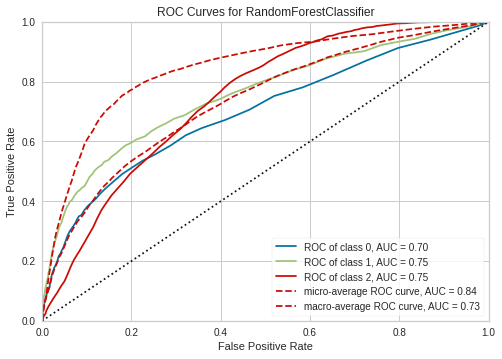

In [ ]:
model_top = top_3_models[0]
plot_model(model_top, plot = 'auc')

In [ ]:
predict_model(top_3_models[0]) # 미리 제외시켜두었던 test data에 대한 예측 결과값

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7077,0.7416,0.5089,0.6802,0.674,0.352,0.3755


,index,income_total,age,employed_year,begin_year,gender_0,car_0,reality_0,child_num_0,child_num_1,...,occyp_type_9,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,credit,Label,Score
0,20880.0,216000.0,49.142467,8.367124,3.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.70
1,14282.0,360000.0,57.528767,8.032877,1.250000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0.73
2,552.0,135000.0,25.901369,2.800000,2.250000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,0.70
3,1671.0,225000.0,56.682190,0.000000,0.916667,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.71
4,19961.0,234000.0,29.098631,5.290411,3.833333,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,15815.0,126000.0,65.517807,0.000000,0.666667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,0.59
6814,7793.0,67500.0,48.282192,25.369864,1.083333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.66
6815,24484.0,108000.0,58.838356,0.000000,0.750000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.82
6816,20136.0,189000.0,59.849316,0.000000,0.583333,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2,0.75


## Blending

In [ ]:
blended = blend_models(estimator_list=top_3_models, 
                        fold=10,
                        optimize='Accuracy',
                        method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7071,0.0,0.4520,0.7018,0.6432,0.2801,0.3523
1,0.7008,0.0,0.4454,0.6804,0.6366,0.2687,0.3326
2,0.6989,0.0,0.4271,0.6649,0.6232,0.2474,0.3259
3,0.6933,0.0,0.4324,0.6853,0.6230,0.2382,0.3087
4,0.6983,0.0,0.4308,0.6709,0.6259,0.2499,0.3240
5,0.7014,0.0,0.4468,0.6901,0.6372,0.2672,0.3347
6,0.7044,0.0,0.4471,0.6889,0.6399,0.2734,0.3424
7,0.7164,0.0,0.4634,0.7317,0.6546,0.3023,0.3793
8,0.6975,0.0,0.4364,0.6925,0.6278,0.2482,0.3213


In [ ]:
final_blended = finalize_model(blended)
print(final_blended)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
top_3_models

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=9, verbose=0,
                        warm_start=False),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_d

In [ ]:
evaluate_model(top_3_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## LogLoss

In [ ]:
from sklearn.metrics import log_loss

clf = setup(train_data, target='credit', train_size=0.85)

,Description,Value
0,session_id,4077
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(22724, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#logloss 적용 및 predict_proba로 제출하기 위해 metric 추가
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f339683bd40>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
#svm, ridge는 predict_proba 미지원으로 제외
best5 = compare_models(fold = 5, sort = 'logloss', n_select = 5, exclude=['svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6968,0.6965,0.4263,0.6864,0.6206,0.2378,0.3188,0.7719,0.656
xgboost,Extreme Gradient Boosting,0.6957,0.7056,0.4393,0.6670,0.6302,0.2552,0.3160,0.7737,9.628
rf,Random Forest Classifier,0.7067,0.7461,0.5135,0.6798,0.6770,0.3523,0.3712,0.7848,2.376
gbc,Gradient Boosting Classifier,0.6929,0.6564,0.4136,0.6560,0.6092,0.2179,0.3064,0.7957,8.336
lda,Linear Discriminant Analysis,0.6435,0.6101,0.3400,0.5563,0.5122,0.0199,0.0707,0.8640,0.198
dummy,Dummy Classifier,0.6405,0.5000,0.3333,0.4103,0.5002,0.0000,0.0000,0.8840,0.046
nb,Naive Bayes,0.6405,0.5672,0.3333,0.4103,0.5002,0.0000,0.0000,0.8847,0.060
lr,Logistic Regression,0.6405,0.5182,0.3333,0.4103,0.5002,0.0000,0.0000,0.8928,0.890
ada,Ada Boost Classifier,0.6918,0.6283,0.4079,0.6515,0.6035,0.2062,0.3057,1.0806,0.780
et,Extra Trees Classifier,0.6778,0.7194,0.5089,0.6518,0.6565,0.3129,0.3217,1.1438,2.280


In [ ]:
blended = blend_models(estimator_list = best5, fold = 5, optimize = 'logloss')
pred_holdout = predict_model(blended)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.7028,0.7253,0.4301,0.6913,0.6262,0.2532,0.3373,0.7543
1,0.6958,0.7299,0.4209,0.6824,0.6159,0.2294,0.3172,0.7615
2,0.7013,0.7469,0.4277,0.7163,0.6230,0.2425,0.3360,0.7476
3,0.6940,0.7323,0.4165,0.6717,0.6119,0.2232,0.3107,0.7605
4,0.6948,0.7313,0.4191,0.7059,0.6138,0.2245,0.3128,0.7616
Mean,0.6977,0.7331,0.4229,0.6935,0.6182,0.2346,0.3228,0.7571
Std,0.0036,0.0073,0.0052,0.0160,0.0055,0.0116,0.0115,0.0055


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6896,0.7427,0.4229,0.7373,0.6095,0.232,0.3211,0.762


In [ ]:
#lda 와 nb는 losloss가 좋지만 accuracy, auc가 상대적으로 좋지 않아 커스텀모델 생성
custom_model = compare_models(fold = 5, sort = 'logloss', n_select = 6, include=['lightgbm','gbc','rf','ada', 'lda', 'nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6968,0.6965,0.4263,0.6864,0.6206,0.2378,0.3188,0.7719,0.842
rf,Random Forest Classifier,0.7067,0.7461,0.5135,0.6798,0.6770,0.3523,0.3712,0.7848,2.334
gbc,Gradient Boosting Classifier,0.6929,0.6564,0.4136,0.6560,0.6092,0.2179,0.3064,0.7957,9.314
lda,Linear Discriminant Analysis,0.6435,0.6101,0.3400,0.5563,0.5122,0.0199,0.0707,0.8640,0.200
nb,Naive Bayes,0.6405,0.5672,0.3333,0.4103,0.5002,0.0000,0.0000,0.8847,0.060
ada,Ada Boost Classifier,0.6918,0.6283,0.4079,0.6515,0.6035,0.2062,0.3057,1.0806,0.790


In [ ]:
blended_custom = blend_models(estimator_list = custom_model, fold = 5, optimize = 'logloss')
pred_holdout_custom = predict_model(blended_custom)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
Fold,,,,,,,,
0,0.6976,0.7240,0.4170,0.6659,0.6137,0.2273,0.3238,0.7944
1,0.6922,0.7257,0.4090,0.6630,0.6047,0.2077,0.3079,0.7997
2,0.6969,0.7446,0.4157,0.7053,0.6118,0.2211,0.3246,0.7910
3,0.6917,0.7303,0.4075,0.7395,0.6030,0.2061,0.3055,0.7980
4,0.6904,0.7291,0.4042,0.6775,0.5998,0.1993,0.3014,0.7987
Mean,0.6938,0.7307,0.4107,0.6902,0.6066,0.2123,0.3126,0.7964
Std,0.0029,0.0073,0.0049,0.0288,0.0053,0.0103,0.0097,0.0032


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6861,0.7377,0.4112,0.7459,0.5982,0.2106,0.3152,0.8029


In [ ]:
#자동으로 상위 5개 선택한 모델
final_model = finalize_model(blended)

#Accurary, AUC, Logloss 셋다 상위 4개인 모델 
final_model_custom = finalize_model(blended_custom)

In [ ]:
final_model

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=4077, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn'...
                                                         n_estimators=100,
                             